In [1]:
import os
import pickle

import numpy as np
import pandas as pd
import seaborn as sns


## Imputation of missing values

In [2]:
apt_data_path = os.path.join(".", "data", "clean_app.csv")

with open(apt_data_path, "r", encoding='utf-8') as f:
    df_apt = pd.read_csv(f)
    df_apt.set_index('property_id', inplace=True)


In [3]:
#imputation: 
#garden, terrace, open fire, firnished - fillna 
#df_apt[[ "garden", "terrace", "open_fire", "furnished"]] = df_apt[[ "garden", "terrace", "open_fire", "furnished"]].fillna(0)
#print(df_apt.info())

In [4]:

#'property_subtype', 'number_of_rooms', 'living_area', 'kitchen_type', 'garden_area',  'number_of_facades', 'state_of_building' - impute with strategy="most_frequent" after splitting into test and train 



In [5]:
print(df_apt.columns)
df_apt = df_apt[['price', 'property_subtype',  'number_of_rooms', 'living_area', 'kitchen_type', 'garden', 'garden_area', 'furnished', 'open_fire', 'terrace','number_of_facades', 'state_of_building', 'postal_code', "latitude", "longitude"]]
print(df_apt.columns)


Index(['locality_name', 'postal_code', 'latitude', 'longitude',
       'property_type', 'property_subtype', 'price', 'type_of_sale',
       'number_of_rooms', 'living_area', 'kitchen_type',
       'fully_equipped_kitchen', 'furnished', 'open_fire', 'terrace',
       'terrace_area', 'garden', 'garden_area', 'surface_of_good',
       'number_of_facades', 'swimming_pool', 'state_of_building', 'main_city',
       'province'],
      dtype='object')
Index(['price', 'property_subtype', 'number_of_rooms', 'living_area',
       'kitchen_type', 'garden', 'garden_area', 'furnished', 'open_fire',
       'terrace', 'number_of_facades', 'state_of_building', 'postal_code',
       'latitude', 'longitude'],
      dtype='object')


## Encoding

In [6]:
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, StandardScaler, KBinsDiscretizer
from sklearn.impute import SimpleImputer



In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_apt.iloc[:, 1:], df_apt['price'], test_size=0.2, random_state=40)

In [8]:
imputations = {
    # most frequent
    'property_subtype': SimpleImputer(strategy="most_frequent"),
    'number_of_rooms': SimpleImputer(strategy='most_frequent'),
    'kitchen_type': SimpleImputer(strategy='most_frequent'),
    'number_of_facades': SimpleImputer(strategy='most_frequent'),
    'state_of_building': SimpleImputer(strategy='most_frequent'),
    "postal_code": SimpleImputer(strategy='most_frequent'),
    "latitude": SimpleImputer(strategy='most_frequent'),
    "longitude": SimpleImputer(strategy='most_frequent'),
    # mean
    'living_area': SimpleImputer(strategy="mean"),
    # constant
    "garden": SimpleImputer(strategy='constant', fill_value=0.0), 
    'garden_area': SimpleImputer(strategy='constant', fill_value=0.0),
    "terrace": SimpleImputer(strategy='constant', fill_value=0.0), 
    "open_fire": SimpleImputer(strategy='constant', fill_value=0), 
    "furnished": SimpleImputer(strategy='constant', fill_value=0.0),
}

# Apply the imputation on the train and test datasets
for column_to_impute, imputer in imputations.items():
    X_train[[column_to_impute]] = imputer.fit_transform(X_train[[column_to_impute]])
    X_test[[column_to_impute]] = imputer.transform(X_test[[column_to_impute]])

# Save the imputations dictionary into the pickle file
with open("imputations.pickle", "wb") as f:
    pickle.dump(imputations, f)

# Example of usage for inference:
# ==================================================
# # Load the imputations from the pickle file
# with open("imputations.pickle", "rb") as f:
#     imputations = pickle.load(f)

# # Apply the imputation on the new test set
# for column_to_impute, imputer in imputations.items():
#     X_test[column_to_impute] = imputer.transform(X_test[column_to_impute])


X_train.head(10)

,property_subtype,number_of_rooms,living_area,kitchen_type,garden,garden_area,furnished,open_fire,terrace,number_of_facades,state_of_building,postal_code,latitude,longitude
property_id,,,,,,,,,,,,,,
11121834,APARTMENT,1.0,70.0,SEMI_EQUIPPED,0.0,0.0,0.0,1,1.0,2.0,TO_BE_DONE_UP,8620,51.148388,2.716603
11153625,DUPLEX,1.0,150.0,HYPER_EQUIPPED,0.0,0.0,0.0,0,1.0,2.0,TO_BE_DONE_UP,9400,50.824044,4.037048
11141239,PENTHOUSE,1.0,48.0,INSTALLED,1.0,35.0,0.0,0,0.0,2.0,GOOD,4960,50.425382,6.034179
11153201,DUPLEX,1.0,96.0,HYPER_EQUIPPED,0.0,0.0,0.0,0,1.0,3.0,AS_NEW,1770,50.878372,4.097889
11159708,APARTMENT,1.0,130.0,INSTALLED,0.0,0.0,0.0,0,1.0,2.0,GOOD,1020,50.872509,4.349807
11155927,GROUND_FLOOR,1.0,87.0,INSTALLED,1.0,27.0,0.0,0,1.0,2.0,GOOD,8370,51.027424,3.696983
11054671,PENTHOUSE,4.0,135.0,HYPER_EQUIPPED,0.0,0.0,0.0,0,1.0,2.0,AS_NEW,8300,51.027424,3.696983
11136827,APARTMENT,1.0,59.0,INSTALLED,0.0,0.0,0.0,0,0.0,2.0,GOOD,8300,51.343751,3.286003
11143332,APARTMENT,7.0,95.0,INSTALLED,0.0,0.0,0.0,0,0.0,2.0,AS_NEW,8500,50.834941,3.266441


In [9]:
encodings = {'property_subtype' : OneHotEncoder(sparse_output=False, handle_unknown='ignore'), 
            'number_of_rooms' : OneHotEncoder(sparse_output=False, handle_unknown='ignore'),
            'number_of_facades' : OneHotEncoder(sparse_output=False, handle_unknown='ignore'),
            'kitchen_type' : OneHotEncoder(sparse_output=False, handle_unknown='ignore'),
            'state_of_building' : OneHotEncoder(sparse_output=False, handle_unknown='ignore')}

for column_to_encode, encoder in encodings.items():
    # fit_transform X_train
    transformed_X_train = encoder.fit_transform(X_train[[column_to_encode]])
    transformed_X_train_df = pd.DataFrame(transformed_X_train, index=X_train.index, columns=encoder.get_feature_names_out())
    X_train = pd.concat([X_train, transformed_X_train_df], axis=1).drop([column_to_encode], axis=1)
    # transform X_test
    transformed_X_test = encoder.transform(X_test[[column_to_encode]])
    transformed_X_test_df = pd.DataFrame(transformed_X_test, index=X_test.index, columns=encoder.get_feature_names_out())
    X_test = pd.concat([X_test, transformed_X_test_df], axis=1).drop([column_to_encode], axis=1)
    
X_train.head(10)

# Save the encodings dictionary into the pickle file
with open("encodings.pickle", "wb") as f:
    pickle.dump(encodings, f)


## Normalization & Standardization

In [10]:
# # example of graph that requires normalization
# xdata, ydata = df_apt["living_area"], df_apt["price"]
# sns.jointplot(x=xdata, y=ydata, kind="kde")
# sns.regplot(x=xdata, y=ydata, scatter=False, color="red")

In [11]:
# # if the graph looks like this, we need to standardize

# xdata, ydata = df_apt["number_of_rooms"], df_apt["price"]
# sns.jointplot(x=xdata, y=ydata, kind="kde")
# sns.regplot(x=xdata, y=ydata, scatter=False, color="red")

# xdata, ydata = df_apt["number_of_facades"], df_apt["price"]
# sns.jointplot(x=xdata, y=ydata, kind="kde")
# sns.regplot(x=xdata, y=ydata, scatter=False, color="red")

In [12]:
# we call both "normalizations"
normalizations = {
    # normalize
    'living_area': MinMaxScaler(),
    # standardize
    'garden_area': StandardScaler(),
}

# Apply the imputation on the train and test datasets
for column_to_normalize, normalizer in normalizations.items():
    X_train[[column_to_normalize]] = normalizer.fit_transform(X_train[[column_to_normalize]])
    X_test[[column_to_normalize]] = normalizer.transform(X_test[[column_to_normalize]])

# Save the imputations dictionary into the pickle file
with open("normalizations.pickle", "wb") as f:
    pickle.dump(normalizations, f)

# Example of usage for inference:
# ==================================================
# # Load the imputations from the pickle file
# with open("imputations.pickle", "rb") as f:
#     imputations = pickle.load(f)

# # Apply the imputation on the new test set
# for column_to_impute, imputer in imputations.items():
#     X_test[column_to_impute] = imputer.transform(X_test[column_to_impute])

X_train

,living_area,garden,garden_area,furnished,open_fire,terrace,postal_code,latitude,longitude,property_subtype_APARTMENT,...,kitchen_type_USA_HYPER_EQUIPPED,kitchen_type_USA_INSTALLED,kitchen_type_USA_SEMI_EQUIPPED,kitchen_type_USA_UNINSTALLED,state_of_building_AS_NEW,state_of_building_GOOD,state_of_building_JUST_RENOVATED,state_of_building_TO_BE_DONE_UP,state_of_building_TO_RENOVATE,state_of_building_TO_RESTORE
property_id,,,,,,,,,,,,,,,,,,,,,
11121834,0.236749,0.0,-0.037414,0.0,1,1.0,8620,51.148388,2.716603,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
11153625,0.519435,0.0,-0.037414,0.0,0,1.0,9400,50.824044,4.037048,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
11141239,0.159011,1.0,0.004916,0.0,0,0.0,4960,50.425382,6.034179,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
11153201,0.328622,0.0,-0.037414,0.0,0,1.0,1770,50.878372,4.097889,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
11159708,0.448763,0.0,-0.037414,0.0,0,1.0,1020,50.872509,4.349807,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11125587,0.321555,0.0,-0.037414,0.0,0,0.0,1180,51.027424,3.696983,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
10803906,0.328622,0.0,-0.037414,0.0,0,1.0,2800,51.027424,3.696983,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
10921414,0.367491,0.0,-0.037414,0.0,0,0.0,8400,51.225389,2.910986,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


## Binning
The non-numerical values need to be divided into bins.

In [13]:
binnings = {"postal_code": KBinsDiscretizer(25, strategy="quantile"),
            "latitude": KBinsDiscretizer(25, strategy="quantile", encode="ordinal"),
            "longitude": KBinsDiscretizer(25, strategy="quantile", encode="ordinal")}

for column_to_bin, discretizer in binnings.items():
    if discretizer.get_params()['encode'] == 'onehot':
        result = discretizer.fit_transform(X_train[[column_to_bin]]).toarray()
        transformed_X_train_df = pd.DataFrame(result, index=X_train.index, columns=discretizer.get_feature_names_out())
        X_train = pd.concat([X_train, transformed_X_train_df], axis=1).drop([column_to_bin], axis=1)
    else:
        result = discretizer.fit_transform(X_train[[column_to_bin]])
        transformed_X_train_df = pd.DataFrame(result, index=X_train.index, columns=[column_to_bin])
        X_train[[column_to_bin]] = transformed_X_train_df
    if discretizer.get_params()['encode'] == 'onehot':
        result = discretizer.transform(X_test[[column_to_bin]]).toarray()
        transformed_X_test_df = pd.DataFrame(result, index=X_test.index, columns=discretizer.get_feature_names_out())
        X_test = pd.concat([X_test, transformed_X_test_df], axis=1).drop([column_to_bin], axis=1)
    else:
        result = discretizer.transform(X_test[[column_to_bin]])
        transformed_X_test_df = pd.DataFrame(result, index=X_test.index, columns=[column_to_bin])
        X_test[[column_to_bin]] = transformed_X_test_df 


with open("binnings.pickle", "wb") as f:
    pickle.dump(binnings, f)

X_train.head(10)

c:\Users\justa\OneDrive\Документы\becode\immo-eliza-ml\.venv\lib\site-packages\sklearn\preprocessing\_discretization.py:322: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 0 are removed. Consider decreasing the number of bins.
  warnings.warn(
c:\Users\justa\OneDrive\Документы\becode\immo-eliza-ml\.venv\lib\site-packages\sklearn\preprocessing\_discretization.py:322: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 0 are removed. Consider decreasing the number of bins.
  warnings.warn(
c:\Users\justa\OneDrive\Документы\becode\immo-eliza-ml\.venv\lib\site-packages\sklearn\preprocessing\_discretization.py:322: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 0 are removed. Consider decreasing the number of bins.
  warnings.warn(


,living_area,garden,garden_area,furnished,open_fire,terrace,latitude,longitude,property_subtype_APARTMENT,property_subtype_DUPLEX,...,postal_code_14.0,postal_code_15.0,postal_code_16.0,postal_code_17.0,postal_code_18.0,postal_code_19.0,postal_code_20.0,postal_code_21.0,postal_code_22.0,postal_code_23.0
property_id,,,,,,,,,,,,,,,,,,,,,
11121834,0.236749,0.0,-0.037414,0.0,1,1.0,15.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
11153625,0.519435,0.0,-0.037414,0.0,0,1.0,4.0,9.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
11141239,0.159011,1.0,0.004916,0.0,0,0.0,0.0,23.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11153201,0.328622,0.0,-0.037414,0.0,0,1.0,8.0,9.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11159708,0.448763,0.0,-0.037414,0.0,0,1.0,7.0,12.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11155927,0.296820,1.0,-0.004760,0.0,0,1.0,12.0,7.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
11054671,0.466431,0.0,-0.037414,0.0,0,1.0,12.0,7.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
11136827,0.197880,0.0,-0.037414,0.0,0,0.0,21.0,3.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
11143332,0.325088,0.0,-0.037414,0.0,0,0.0,5.0,3.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [14]:
def concat_latlon(lat, lon):
    return str(int(lat))+"x"+str(int(lon))

X_train["latlon"] = X_train.apply(lambda row: concat_latlon(row["latitude"], row["longitude"]), axis=1)
X_train.drop(["latitude","longitude"], axis=1, inplace=True)
X_test["latlon"] = X_test.apply(lambda row: concat_latlon(row["latitude"], row["longitude"]), axis=1)
X_test.drop(["latitude", "longitude"], axis=1, inplace=True)

In [15]:
encoding_latlon = {'latlon' : OneHotEncoder(sparse_output=False, handle_unknown='ignore')}

for column_to_encode, encoder in encoding_latlon.items():
    # fit_transform X_train
    transformed_X_train = encoder.fit_transform(X_train[[column_to_encode]])
    transformed_X_train_df = pd.DataFrame(transformed_X_train, index=X_train.index, columns=encoder.get_feature_names_out())
    X_train = pd.concat([X_train, transformed_X_train_df], axis=1).drop([column_to_encode], axis=1)
    # transform X_test
    transformed_X_test = encoder.transform(X_test[[column_to_encode]])
    transformed_X_test_df = pd.DataFrame(transformed_X_test, index=X_test.index, columns=encoder.get_feature_names_out())
    X_test = pd.concat([X_test, transformed_X_test_df], axis=1).drop([column_to_encode], axis=1)
    
print(X_train.head(10))

# Save the encodings dictionary into the pickle file
with open("encoding_latlon.pickle", "wb") as f:
    pickle.dump(encoding_latlon, f)


             living_area  garden  garden_area  furnished  open_fire  terrace  \
property_id                                                                    
11121834        0.236749     0.0    -0.037414        0.0          1      1.0   
11153625        0.519435     0.0    -0.037414        0.0          0      1.0   
11141239        0.159011     1.0     0.004916        0.0          0      0.0   
11153201        0.328622     0.0    -0.037414        0.0          0      1.0   
11159708        0.448763     0.0    -0.037414        0.0          0      1.0   
11155927        0.296820     1.0    -0.004760        0.0          0      1.0   
11054671        0.466431     0.0    -0.037414        0.0          0      1.0   
11136827        0.197880     0.0    -0.037414        0.0          0      0.0   
11143332        0.325088     0.0    -0.037414        0.0          0      0.0   
11162681        0.243816     0.0    -0.037414        0.0          0      0.0   

             property_subtype_APARTMENT

<Axes: xlabel='longitude', ylabel='Count'>

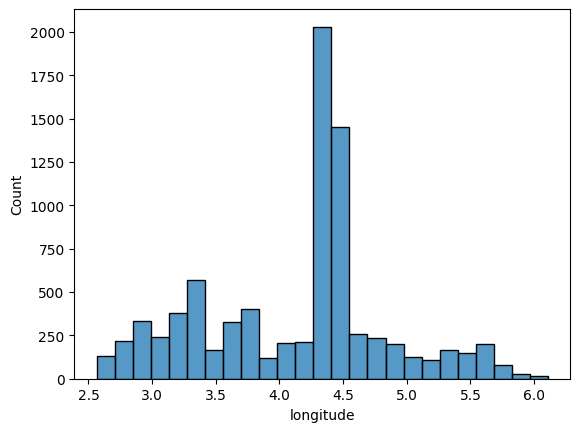

In [16]:
sns.histplot(df_apt["longitude"], bins = 25)

In [18]:
X_train.to_csv("./data/X_train.csv")
X_test.to_csv("./data/X_test.csv")